In [2]:
# ライブラリの読み込み
import cv2 # OpenCVはcv2という名称で扱われる
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 画像の読み込み
img = cv2.imread('misc/4.2.04.tiff')

In [4]:
# 画像の型を確認
type(img)

numpy.ndarray

In [5]:
# 画像の形を確認
img.shape

(512, 512, 3)

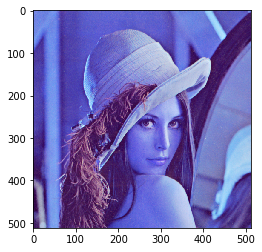

In [6]:
# matplotによる画像表示
# 画像が青みがかっていることに注意
plt.imshow(img)

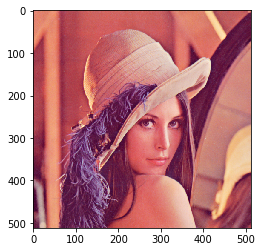

In [7]:
# BGRをRGBに変換する
# (画像, 変換のしかた)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [8]:
# 画像データの保存
# (保存先パス, 画像)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('misc/new_lenna.jpg', img)

True

In [9]:
# 色空間をRGB空間に変換
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

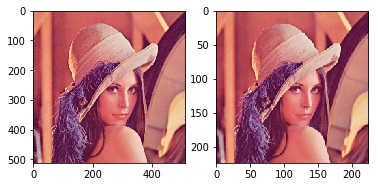

In [10]:
# 画像のリサイズ
# (画像, 変換後のサイズを表すタプル)
resized = cv2.resize(img, (224, 224))

# リサイズを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# リサイズを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(resized)

In [11]:
# 変換前後の画像の形を出力
print(img.shape)
print(resized.shape)

(512, 512, 3)
(224, 224, 3)


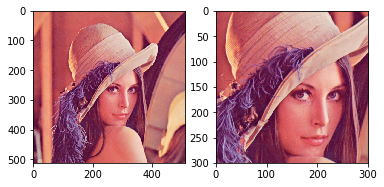

In [12]:
# 画像のクロップを実行
# 数値を指定して実行
cropped_1 = img[100:400,100:400,:]

# クロップを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# クロップを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(cropped_1)

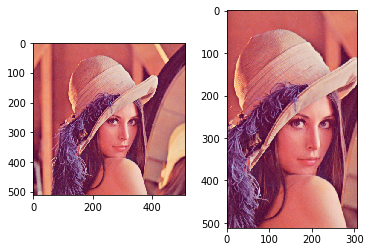

In [13]:
# 画像のクロップを実行
# 比率を指定して実行
h, w, c = img.shape
cropped_2 = img[:, int(w * (1/5)): int(w *(4/5)), :]

# クロップを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# クロップを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(cropped_2)

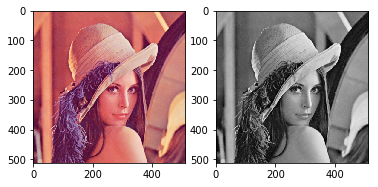

In [14]:
# グレースケール化の実行
grayed = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# グレースケール化を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# グレースケール化を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(grayed)
plt.gray()


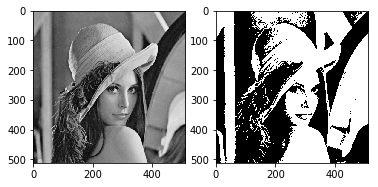

In [15]:
# 2値化を実行
# (画像（グレースケール）, しきい値, 明るさの上限, しきい値の取り方)
th, binary = cv2.threshold(grayed, 125, 255, cv2.THRESH_BINARY)

# グレースケール化を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(grayed)
# グレースケール化を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(binary)
plt.gray()

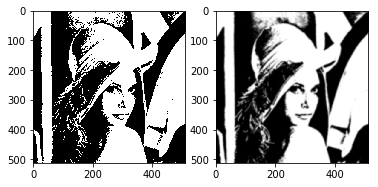

In [16]:
# 平滑化を実行
# ガウシアンフィルタを利用
# (画像, 平滑化の粗さを表す奇数のタプル, 標準偏差)
blurred = cv2.GaussianBlur(binary, (11, 11), 0)

# 平滑化を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(binary)
# 平滑化を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(blurred)

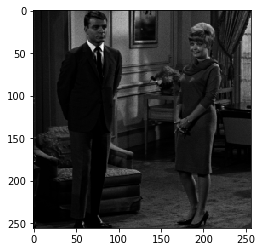

In [17]:
# 暗い画像を出力
# imread関数に引数0を渡すと､初めからグレースケールになる
img_2 = cv2.imread('misc/4.1.02.tiff', 0)
plt.imshow(img_2)

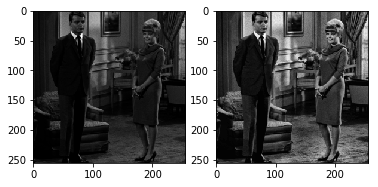

In [18]:
# CLAHEの処理を実行
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img_2)

# 平滑化を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img_2)
# 平滑化を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(cl1)

In [19]:
# 3章で利用したtrainデータの読み込み
import pickle
with open('train.pickle', 'rb') as f:
    train = pickle.load(f, encoding='bytes')
X_train = train['data']

# スケーリング処理
X_train /= 255 # 正規化
X_train -= np.mean(X_train) # Mean Substruction

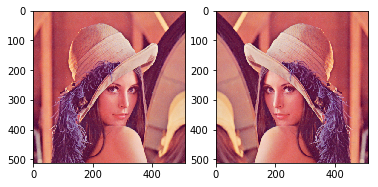

In [20]:
# flipを行う
flipped = cv2.flip(img, 1)

# flipを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# flipを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(flipped)

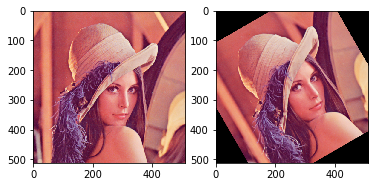

In [21]:
# 表示する画像のサイズ(変換前と同じサイズに指定)
size = (img.shape[0], img.shape[1])
# 回転の中心位置を表す座標（画像の中心に指定）
center = (int(size[0]/2), int(size[1]/2))
# 回転角度
angle = 30
# 拡大･縮小の比率（拡大･縮小なしに指定）
scale = 1.0

# 回転変換を表す行列をつくる
# (中心位置, 回転角度, 拡大･縮小の比率)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
# 回転変換を行う
# (画像, 回転行列, 変換後の画像サイズ)
rotated = cv2.warpAffine(img, rotation_matrix, size)

# rotateを行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# rotateを行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(rotated)

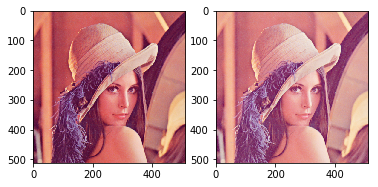

In [22]:
# ガンマ値を指定
gamma = 1.5

# 色対応表を定義
look_up_table = np.zeros((256, 1), dtype='uint8')
# 全ての対応表を
for i in range(256):
    look_up_table[i][0] = 255 * pow(float(i) / 255, 1.0 / gamma)
img_gamma = cv2.LUT(img, look_up_table)

# ガンマ変換を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# ガンマ変換を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(img_gamma)

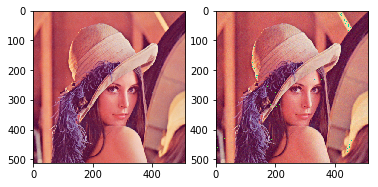

In [23]:
# 変換後の画像のサイズを指定
row, col, ch = img.shape

# ガウス分布の平均と標準編纂を指定
mean = 0
sigma = 5
# imgと同じサイズのノイズ画像を生成
noise = np.random.normal(mean, sigma, (row, col, ch))
noise = noise.reshape(row,col,ch)
# imgにノイズ画像を被せる
noised = img + noise
noised /= 255

# ノイズを加える前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)

# ノイズを加えた後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(noised)

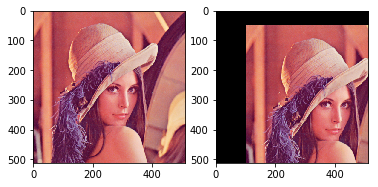

In [24]:
# 変換後の画像のサイズを指定
rows, cols, channnels = img.shape
# 変換行列
M = np.float32([[1,0,100],[0,1,50]])
# 並進移動の実行
moved = cv2.warpAffine(img, M, (cols, rows))

# 並進移動を行う前の画像を出力
plt.subplot(1, 2, 1)
plt.imshow(img)
# 並進移動を行った後の画像を出力
plt.subplot(1, 2, 2)
plt.imshow(moved)

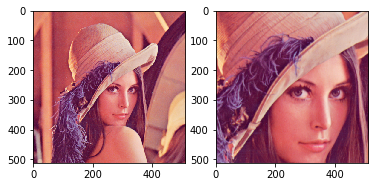

In [25]:
# 画像サイズを一度拡大する
# (画像, 変換後のサイズ, 横の拡大比率, 縦の拡大比率)
zoomed_in = cv2.resize(img, None, fx=2.0, fy=2.0)

# 変換前後のshapeを指定する
height_1, width_1, channel_1 = img.shape # 元画像と同じサイズにするので､そのサイズを取得
height_2, width_2, channel_2 = zoomed_in.shape # 拡大後の画像のサイズを取得

# x、y軸それぞれの切り取り開始点の決定
# ピクセルの指定は整数になるようにする
x =  int((width_2 - width_1) / 2)
y =  int((height_2 - height_1) / 2)

#切り取り開始点から元の画像分のサイズを切り取る
zoomed_in = zoomed_in[x:x+width_1, y:y+height_1]


# 拡大前の画像を出力
plt.subplot(121)
plt.imshow(img)
# 拡大後の画像を出力
plt.subplot(122)
plt.imshow(zoomed_in)

In [26]:
# 必要なライブラリの読み込み
import pickle
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2

import chainer
import chainer.functions as F
import chainer.links as L
from chainer import optimizers
from chainer.datasets import tuple_dataset, TransformDataset
from chainer.training import extensions
from chainer import optimizers, serializers, training, iterators

/Users/akizakimasato/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [27]:
# pickle形式のファイルを読み込む関数
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        list = pickle.load(fo, encoding='bytes')
    return list

In [28]:
# ダウンロードしたファイルはpickle形式で保存されているため、扱いやすいように読み込む
train = unpickle('train.pickle')
test = unpickle('test.pickle')
label = unpickle('label.pickle')

In [29]:
# 訓練用データ(2500件)
# テスト用データ(500件)
N_train = len(train)
N_test = len(test)
X_train = train['data']
X_test = test['data']
y_train = train['label']
y_test = test['label']

In [30]:
class PretrainedVGG16(chainer.Chain):
    # (分類クラス数, 誤差関数, 性能指標)
    def __init__(self, n_class=5, lossfun = F.softmax_cross_entropy, accfun = F.accuracy):
        super(PretrainedVGG16, self).__init__()
        with self.init_scope():
            self.base = L.VGG16Layers() # 学習済みモデルを利用
            self.new_fc8 = L.Linear(None, n_class) # 新しい最終層を定義
            self.lossfun = lossfun # 誤差関数を定義
            self.accfun = accfun # 性能指標を定義
            
    def __call__(self, x, t):
        # 学習をしないとき､勾配の情報を保持しないようにしてメモリを節約
        with chainer.using_config('enable_backprop', False):
            x = np.asarray(x, dtype=np.float32)
        
        h = F.relu(self.base(x, layers=['fc7'])['fc7']) # 学習済みモデルのfc7層までの出力
        y = self.new_fc8(h) # 最終層の出力
        return self.lossfun(y, t) # 誤差関数

In [ ]:
# モデルのインスタンスを生成
model = PretrainedVGG16(n_class=5)

In [ ]:
# 重みの固定
# 新たに定義したfc8のパラメータのみ学習される
model.base.disable_update()

In [ ]:
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)
batchsize = 100
n_epoch = 1 # 簡単に動作確認をするため､epochを1に設定

In [ ]:
# data augmentationを行う関数
def get_augmented(img, random_crop=4):
    img = img.transpose(1, 2, 0)

    # 左右反転のノイズを加える
    if np.random.rand() > 0.5:
        img = np.fliplr(img)
        
    # 左右どちらかに30度回転させる
    if np.random.rand() > 0.5:
        size = (img.shape[0], img.shape[1])
        # 画像の中心位置(x, y)
        center = (int(size[0]/2), int(size[1]/2))
        # 回転させたい角度
        angle = np.random.randint(-30, 30)
        # 拡大比率
        scale = 1.0
        # 回転変換行列の算出
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
        # 並進移動
        img = cv2.warpAffine(img, rotation_matrix, size, flags=cv2.INTER_CUBIC)
    
    # BGRをRGBに変換
    img = img.transpose(2, 0, 1)
    
    return img

In [ ]:
# 画像の前処理を行う関数
def process_image(inputs):
    image, label = inputs
    
    # サイズをVGG16指定のものに変換する
    # チャンネルをchainer指定の配置にする
    image = cv2.resize(image.transpose(1, 2, 0), (224, 224)).transpose(2, 0, 1)
    
    # RGBからそれぞれvgg指定の値を引く(mean-subtractionに相当)
    image[0, :, :] -= 100
    image[1, :, :] -= 116.779
    image[2, :, :] -= 123.68
    
    # 0-1正規化
    image /= image.max()
    
    # augmentation
    image = get_augmented(image)
    
    return image, label

In [ ]:
# trainerを利用して学習を行う
train_data = tuple_dataset.TupleDataset(X_train, y_train)
test_data = tuple_dataset.TupleDataset(X_test, y_test)

# データセットに前処理を加える
train_data = TransformDataset(train_data, process_image)
test_data = TransformDataset(test_data, process_image)

In [ ]:
# trainerを利用して学習
train_iter = iterators.SerialIterator(train_data,batch_size=batchsize,shuffle=True)
test_iter = iterators.SerialIterator(test_data,batch_size=1,shuffle=False,repeat=False)
updater = training.StandardUpdater(train_iter,optimizer)
trainer = training.Trainer(updater,(n_epoch,'epoch'),out = 'result')

trainer.extend(extensions.Evaluator(test_iter, model))
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(['epoch', 'main/accuracy', 'main/loss', 'validation/main/accuracy', 'validation/main/loss']))
trainer.extend(extensions.ProgressBar())
trainer.extend(extensions.PlotReport(['main/accuracy', 'validation/main/accuracy'],
                          'epoch', file_name='accuracy.png'))
trainer.extend(extensions.PlotReport(['main/loss', 'validation/main/loss'],
                          'epoch', file_name='loss.png'))

trainer.run()